In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
clinical_trial_complete = pd.merge(clinical_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_trial_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtv = clinical_trial_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mtv_df = pd.DataFrame(mtv)

#resetting the index
mtv_df.reset_index(inplace=True)

# Preview DataFrame
mtv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoin
stv = clinical_trial_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
stv_df = pd.DataFrame(stv)

#reset Index
stv_df.reset_index(inplace=True)

# Preview DataFrame
stv_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mtv_format_df = mtv_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
stv_format_df = stv_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mtv_format_df
#stv_format_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Plot
#fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
#fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(year), max(year))
#ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
#ax1.plot(year, vc_fit, "b--", linewidth=1)
#ax1.set_ylabel("Violent Crime Rate")

#ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
#ax2.plot(year, m_fit, "r--", linewidth=1)
#ax2.set_ylabel("Murder Rate")

#ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
#ax3.plot(year, aa_fit, "g--", linewidth=1)
#ax3.set_ylabel("Aggravated Assault Rate")
#ax3.set_xlabel("Year")



Text(0, 0.5, 'Mean Tumor Volume')

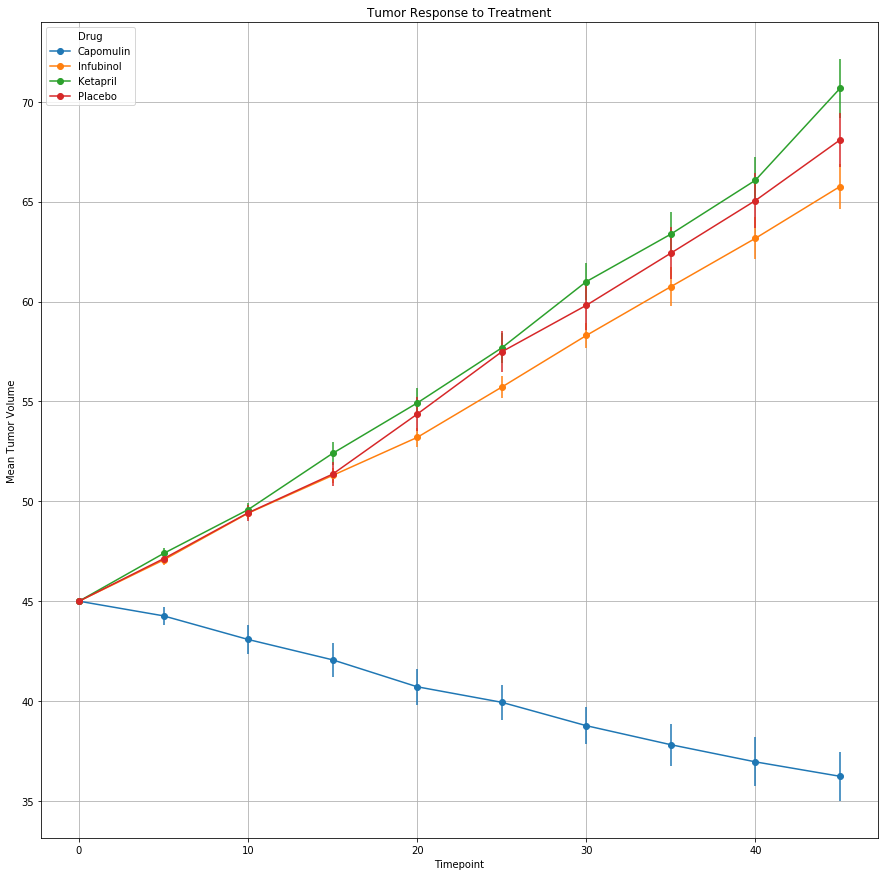

In [62]:
# Generate the Plot (with Error Bars)
plot1 = mtv_format_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(kind="line", figsize=(15,15), title="Tumor Response to Treatment", grid=True, yerr=stv_format_df, marker="o")
plot1.set_xlabel("Timepoint")
plot1.set_ylabel("Mean Tumor Volume")

# Save the Figure
#plt.savefig("tumor_reponse_time_to_treatment.png")



In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mms = clinical_trial_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mms_df = pd.DataFrame(mms)

#resetting the index
mms_df.reset_index(inplace=True)

# Preview DataFrame
mms_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sms = clinical_trial_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sms_df = pd.DataFrame(sms)

#reset Index
sms_df.reset_index(inplace=True)

# Preview DataFrame
sms_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
mms_format_df = mms_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
sms_format_df = sms_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
mms_format_df
#sms_format_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


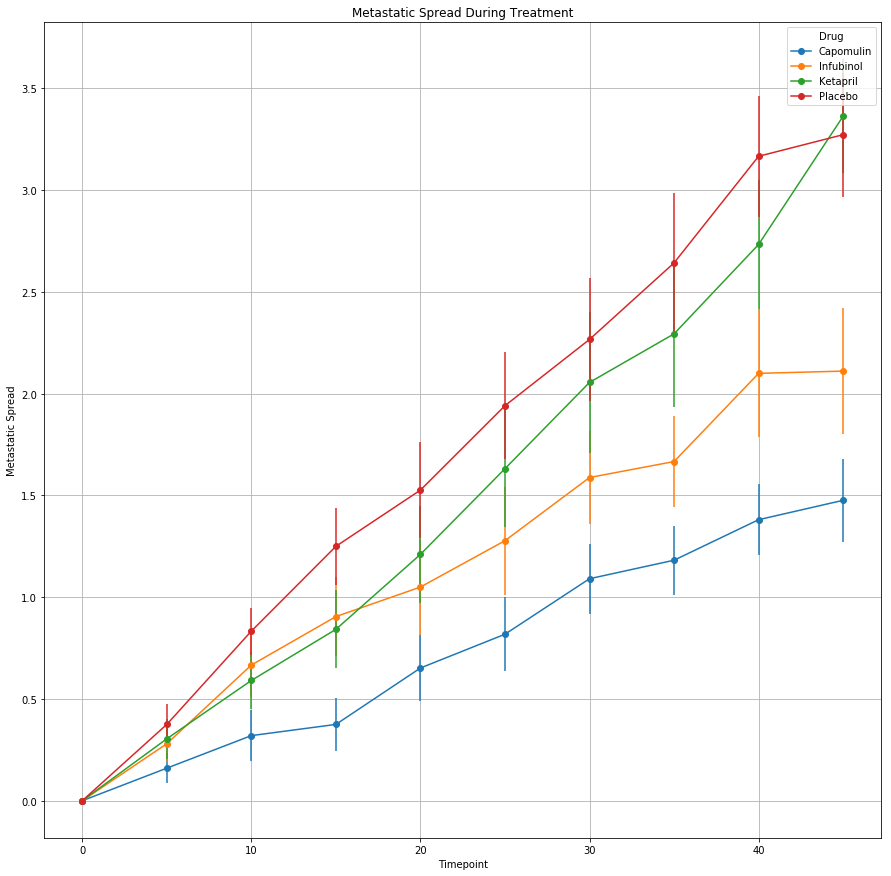

In [63]:
# Generate the Plot (with Error Bars)

plot2 = mms_format_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(kind="line", figsize=(15,15), title="Metastatic Spread During Treatment", grid=True, yerr=sms_format_df, marker="o")

plot2.set_xlabel("Timepoint")
plot2.set_ylabel("Metastatic Spread")
# Save the Figure
plt.savefig("metastatic_spread_during_treatment.png")




In [12]:
# Show the Figure

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = clinical_trial_complete.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
mc_df = pd.DataFrame(mice_count)

#resetting the index
mc_df.reset_index(inplace=True)

# Preview DataFrame
mc_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mc_format_df = mc_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")


# Preview that Reformatting worked
mc_format_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


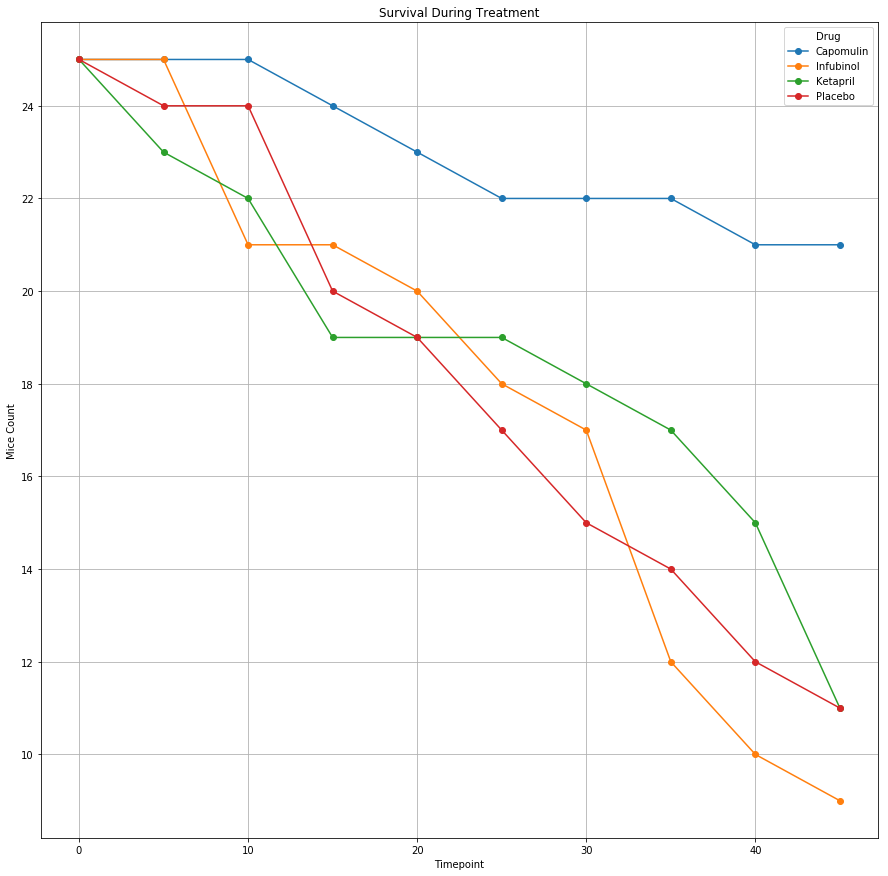

In [64]:
# Generate the Plot (Accounting for percentages)
plot3 = mc_format_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(kind="line", figsize=(15,15), title="Survival During Treatment", grid=True, marker="o")

plot3.set_xlabel("Timepoint")
plot3.set_ylabel("Mice Count")
# Save the Figure
plt.savefig("mice_count.png")
# Show the Figure
plt.show()

In [16]:
mtv_format_transposed_df = mtv_format_df.T
mtv_format_transposed_df

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,47.062001,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506
Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082
Propriva,45.0,47.248967,49.101541,51.067318,53.346737,55.504138,58.196374,60.350199,63.045537,66.258529
Ramicane,45.0,43.944859,42.531957,41.495061,40.238325,38.974300,38.703137,37.451996,36.574081,34.955595
Stelasyn,45.0,47.527452,49.463844,51.529409,54.067395,56.166123,59.826738,62.440699,65.356386,68.438310


## Summary Bar Graph

In [31]:
# Calculate the percent changes for each drug
per_change = ((mtv_format_transposed_df[45] - mtv_format_transposed_df[0])/mtv_format_transposed_df[0])*100

# Display the data to confirm
per_change



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

<BarContainer object of 4 artists>

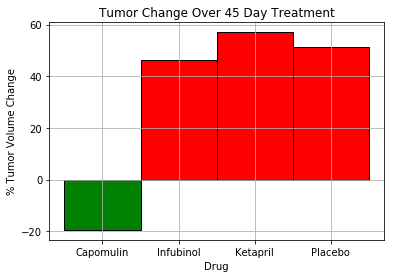

In [60]:
# Store all Relevant Percent Changes into a Tuple
x = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
per_change = per_change[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Splice the data between passing and failing drugs
passing = per_change <= 0
passing

colors = []
for drug in passing:
    if drug == True:
       colors.append('g')
    else:
       colors.append('r')
    
colors

# Orient widths. Add labels, tick marks, etc. 

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
fig, ax = plt.subplots()

ax.grid(True)
plt.yticks(np.arange(-20, max(per_change)+20, 20))
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
ax.bar(x, per_change, width = 1.0, color=colors, edgecolor='black')
# Show the Figure
#fig.show()